In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\Gudavalli\\Desktop\\IIDT\\MACHINE LEARNING')

Direct Marketing
1. Given data is from a direct marketer who sells his product only via direct email
2. He sends catalogues with product characteristics to customers, who can directly order from catalogue
3. Learn what makes some customers spend more than others

In [3]:
dm=pd.read_csv('dm.csv')
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


Exploration and preparation

In [4]:
#Sanity check
# to get them in a percentage format we divide with dm.shape[0]
#to check if there are any null values we will use (isnull)
dm.isnull().sum()/dm.shape[0]

Age            0.000
Gender         0.000
OwnHome        0.000
Married        0.000
Location       0.000
Salary         0.000
Children       0.000
History        0.303
Catalogs       0.000
AmountSpent    0.000
Cust_Id        0.000
dtype: float64

In [5]:
dm['History'].unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [6]:
dm['History']=dm['History'].fillna('Missing',axis=0)

In [7]:
dm['History'].unique()

array(['High', 'Low', 'Medium', 'Missing'], dtype=object)

In [8]:
dm['History'].value_counts()

Missing    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [9]:
# get the statistics
dm['AmountSpent'].describe()

count    1000.000000
mean     1216.770000
std       961.068613
min        38.000000
25%       488.250000
50%       962.000000
75%      1688.500000
max      6217.000000
Name: AmountSpent, dtype: float64

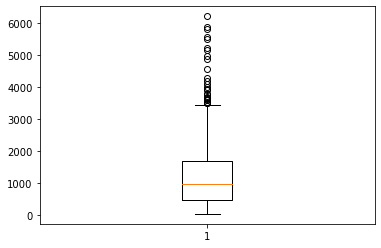

In [10]:
# 
b=plt.boxplot(dm['AmountSpent'])

In [11]:
b

{'whiskers': [<matplotlib.lines.Line2D at 0x2944ea1dc88>,
 'caps': [<matplotlib.lines.Line2D at 0x2944ea29d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2944ea1d108>],
 'medians': [<matplotlib.lines.Line2D at 0x2944ea2fe88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2944ea2ff48>],
 'means': []}

In [12]:
#to access the Outliers (to get the observations which are outliers)
out=[i.get_ydata() for i in b['fliers']]
out

[array([5564, 3655, 3604, 4182, 4558, 3505, 3688, 3596, 4279, 4894, 3491,
        5830, 3632, 3916, 3671, 5151, 3941, 5878, 5209, 4984, 4109, 3995,
        3780, 6217, 3785, 3537, 5503], dtype=int64)]

In [13]:
dm['Salary'].describe()

count      1000.000000
mean      56103.900000
std       30616.314826
min       10100.000000
25%       29975.000000
50%       53700.000000
75%       77025.000000
max      168800.000000
Name: Salary, dtype: float64

In [14]:
# to filter the data we use(isin)
dm[dm['AmountSpent'].isin(out[0])]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
14,Old,Female,Own,Married,Far,110000,0,High,24,5564,477
43,Old,Female,Rent,Married,Far,81500,0,High,18,3655,1010
51,Middle,Female,Own,Married,Far,87200,0,High,18,3604,1095
69,Middle,Male,Own,Single,Far,72300,0,High,24,4182,689
91,Old,Male,Own,Married,Close,134500,0,High,24,4558,170
123,Middle,Male,Own,Married,Close,105300,1,Missing,18,3505,684
138,Young,Female,Own,Married,Far,68000,0,High,24,3688,404
146,Old,Female,Own,Married,Close,114800,0,High,18,3596,176
152,Middle,Female,Own,Married,Far,109800,0,High,18,4279,1024
169,Middle,Male,Own,Married,Far,140000,0,High,12,4894,865


In [15]:
out[0]

array([5564, 3655, 3604, 4182, 4558, 3505, 3688, 3596, 4279, 4894, 3491,
       5830, 3632, 3916, 3671, 5151, 3941, 5878, 5209, 4984, 4109, 3995,
       3780, 6217, 3785, 3537, 5503], dtype=int64)

Understand relationship between DV and IVs

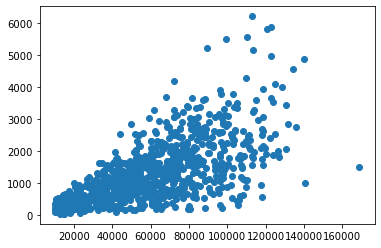

In [16]:
#Relationship between Salary and AmountSpent 
# since both variables are continous variables we use scatter plot.
plt.scatter(dm['Salary'],dm['AmountSpent']) #Might be heteroescadasticity

Text(0.5, 0.98, '')

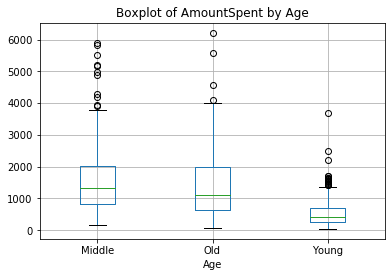

In [17]:
#Distribution of AmountSpent by Age
dm.boxplot('AmountSpent',by='Age')
plt.title(label='Boxplot of AmountSpent by Age')
plt.suptitle("")

In [18]:
import seaborn as sb
byage=dm.groupby('Age')['AmountSpent'].mean().reset_index()
byage

,Age,AmountSpent
0,Middle,1501.690945
1,Old,1432.126829
2,Young,558.623693


In [19]:
for i , v in byage.iterrows():
    print((i,v))

(0, Age             Middle
AmountSpent    1501.69
Name: 0, dtype: object)
(1, Age                Old
AmountSpent    1432.13
Name: 1, dtype: object)
(2, Age              Young
AmountSpent    558.624
Name: 2, dtype: object)


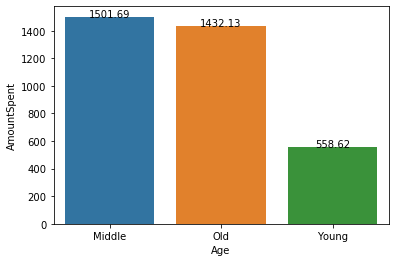

In [20]:
p=sb.barplot(x='Age',y='AmountSpent',data=byage)

for i, v in byage.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")
    #'i' represents row numbers and'v' reperesents values

Text(0.5, 0.98, '')

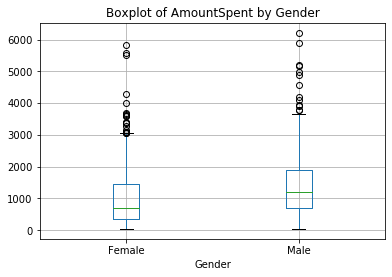

In [21]:
#Distribution of AmountSpent by Gender
dm.boxplot('AmountSpent',by='Gender')
plt.title(label='Boxplot of AmountSpent by Gender')
plt.suptitle("")

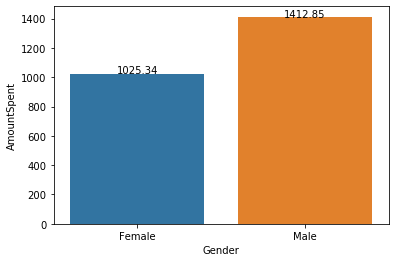

In [22]:
bygen=dm.groupby('Gender')['AmountSpent'].mean().reset_index()
bygen

p=sb.barplot(x='Gender',y='AmountSpent',data=bygen)

for i, v in bygen.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

Text(0.5, 0.98, '')

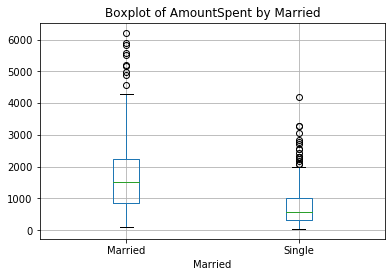

In [23]:
#Distribution of AmountSpent by Married
dm.boxplot('AmountSpent',by='Married')
plt.title(label='Boxplot of AmountSpent by Married')
plt.suptitle("")

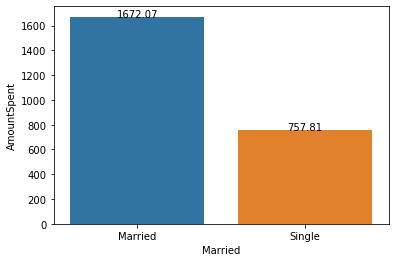

In [24]:
bymar=dm.groupby('Married')['AmountSpent'].mean().reset_index()
bymar

p=sb.barplot(x='Married',y='AmountSpent',data=bymar)

for i, v in bymar.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

Text(0.5, 0.98, '')

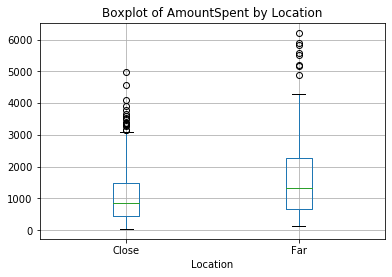

In [25]:
#Distribution of AmountSpent by Location
dm.boxplot('AmountSpent',by='Location')
plt.title(label='Boxplot of AmountSpent by Location')
plt.suptitle("")

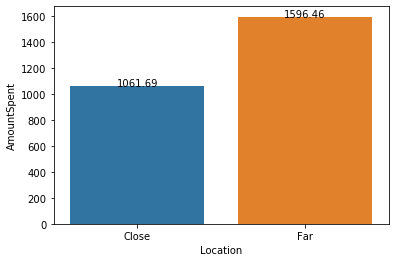

In [26]:
byloc=dm.groupby('Location')['AmountSpent'].mean().reset_index()
byloc

p=sb.barplot(x='Location',y='AmountSpent',data=byloc)

for i, v in byloc.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

In [27]:
#Distribution of AmountSpent by History
byhist=dm.groupby('History')['AmountSpent'].mean().reset_index()
byhist

,History,AmountSpent
0,High,2186.137255
1,Low,357.086957
2,Medium,950.400943
3,Missing,1239.900990


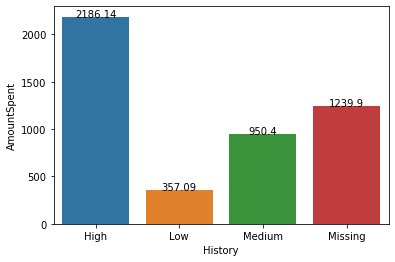

In [28]:
p=sb.barplot(x='History',y='AmountSpent',data=byhist)

for i, v in byhist.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

In [29]:
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [30]:
dm.groupby('Age')['Age'].count()

Age
Middle    508
Old       205
Young     287
Name: Age, dtype: int64

In [31]:
dm.groupby('Gender')['Gender'].count()

Gender
Female    506
Male      494
Name: Gender, dtype: int64

In [32]:
dm.groupby('OwnHome')['OwnHome'].count()

OwnHome
Own     516
Rent    484
Name: OwnHome, dtype: int64

In [33]:
dm.groupby('Married')['Married'].count()

Married
Married    502
Single     498
Name: Married, dtype: int64

In [34]:
dm.groupby('Location')['Location'].count()

Location
Close    710
Far      290
Name: Location, dtype: int64

In [35]:
# realtionship between gender and martial status
from scipy.stats import chi2_contingency
#H0 = there is a no relationship between gender and marital status
table=pd.crosstab(dm['Gender'],dm['Married'])
chi2_contingency(table)
# reject the null hypothesis.

(13.009027718462155, 0.00030999285491423476, 1, array([[254.012, 251.988],
        [247.988, 246.012]]))

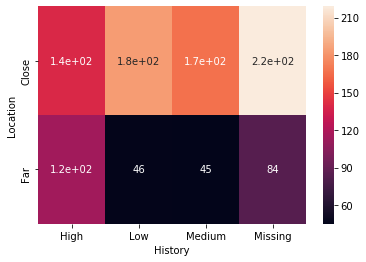

In [36]:
table1=pd.crosstab(dm['Location'],dm['History'])
sns.heatmap(table1,annot = True)

In [37]:
#Create dummies
data=pd.get_dummies(dm,prefix_sep='').drop('Cust_Id',axis=1)
data.head()

,Salary,Children,Catalogs,AmountSpent,AgeMiddle,AgeOld,AgeYoung,GenderFemale,GenderMale,OwnHomeOwn,OwnHomeRent,MarriedMarried,MarriedSingle,LocationClose,LocationFar,HistoryHigh,HistoryLow,HistoryMedium,HistoryMissing
0,47500,0,6,755,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1318,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,296,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,2436,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,1304,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [39]:
AmountSpent~AgeMiddle+AgeYoung+GenderFemale+OwnHomeOwn+MarriedMarried+LocationClose+Salary+Children+HistoryHigh+HistoryLow+HistoryMissing+Catalogs

SyntaxError: invalid syntax (<ipython-input-39-a0ae7ff91228>, line 1)

In [40]:
#Linear model to predict Amount Spent
from statsmodels.formula.api import ols
mod1=ols('AmountSpent~AgeMiddle+AgeYoung+GenderFemale+OwnHomeOwn+MarriedMarried+LocationClose+Salary+Children+HistoryHigh+HistoryLow+HistoryMissing+Catalogs',data).fit()

In [41]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     243.7
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          4.66e-285
Time:                        10:58:17   Log-Likelihood:                -7598.0
No. Observations:                1000   AIC:                         1.522e+04
Df Residuals:                     987   BIC:                         1.529e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -221.1741     79.205     -2.792      0.005    -376.603     -65.745
AgeMiddle        -63.3683     47.796     -1.326      0.185    -157.161      30.425
AgeYoung         -54.4671     54.421     -1.001      0.317    -161.262      52.328
GenderFemale      46.9984     32.852      1.431      0.153     -17.469     111.466
OwnHomeOwn        16.6338     36.643      0.454      0.650     -55.274      88.541
MarriedMarried   -32.7431     44.541     -0.735      0.462    -120.148      54.662
LocationClose   -436.5057     35.921    -12.152      0.000    -506.997    -366.015
Salary             0.0192      0.001     18.652      0.000       0.017       0.021
Children        -162.7355     18.003     -9.039      0.000    -198.065    -127.406
HistoryHigh      404.4101     52.944      7.638      0.000     300.514     508.306
HistoryLow        51.5148     52.155      0.988      0.324     -50.832     153.862
HistoryMissing   411.4023     44.866      9.170      0.000     323.360     499.445
Catalogs          41.8688      2.458     17.034      0.000      37.045      46.692
==============================================================================
Omnibus:                      289.119   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1381.935
Skew:                           1.259   Prob(JB):                    8.25e-301
Kurtosis:                       8.179   Cond. No.                     3.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
mod2=ols('AmountSpent~AgeMiddle+AgeYoung+GenderMale+OwnHomeRent+MarriedMarried+LocationClose+Salary+Children+HistoryMissing+HistoryHigh+HistoryMedium+Catalogs',data).fit()

In [43]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     243.7
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          4.66e-285
Time:                        10:58:19   Log-Likelihood:                -7598.0
No. Observations:                1000   AIC:                         1.522e+04
Df Residuals:                     987   BIC:                         1.529e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -106.0271     73.538     -1.442      0.150    -250.336      38.281
AgeMiddle        -63.3683     47.796     -1.326      0.185    -157.161      30.425
AgeYoung         -54.4671     54.421     -1.001      0.317    -161.262      52.328
GenderMale       -46.9984     32.852     -1.431      0.153    -111.466      17.469
OwnHomeRent      -16.6338     36.643     -0.454      0.650     -88.541      55.274
MarriedMarried   -32.7431     44.541     -0.735      0.462    -120.148      54.662
LocationClose   -436.5057     35.921    -12.152      0.000    -506.997    -366.015
Salary             0.0192      0.001     18.652      0.000       0.017       0.021
Children        -162.7355     18.003     -9.039      0.000    -198.065    -127.406
HistoryMissing   359.8875     46.711      7.705      0.000     268.223     451.552
HistoryHigh      352.8953     65.575      5.382      0.000     224.212     481.578
HistoryMedium    -51.5148     52.155     -0.988      0.324    -153.862      50.832
Catalogs          41.8688      2.458     17.034      0.000      37.045      46.692
==============================================================================
Omnibus:                      289.119   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1381.935
Skew:                           1.259   Prob(JB):                    8.25e-301
Kurtosis:                       8.179   Cond. No.                     3.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
mod3=ols('AmountSpent~AgeMiddle+AgeOld+GenderMale+OwnHomeRent+MarriedMarried+LocationClose+Salary+Children+HistoryLow+HistoryHigh+HistoryMedium+Catalogs',data).fit()

In [45]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     243.7
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          4.66e-285
Time:                        10:58:21   Log-Likelihood:                -7598.0
No. Observations:                1000   AIC:                         1.522e+04
Df Residuals:                     987   BIC:                         1.529e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        199.3934     71.577      2.786      0.005      58.933     339.853
AgeMiddle         -8.9012     49.701     -0.179      0.858    -106.432      88.630
AgeOld            54.4671     54.421      1.001      0.317     -52.328     161.262
GenderMale       -46.9984     32.852     -1.431      0.153    -111.466      17.469
OwnHomeRent      -16.6338     36.643     -0.454      0.650     -88.541      55.274
MarriedMarried   -32.7431     44.541     -0.735      0.462    -120.148      54.662
LocationClose   -436.5057     35.921    -12.152      0.000    -506.997    -366.015
Salary             0.0192      0.001     18.652      0.000       0.017       0.021
Children        -162.7355     18.003     -9.039      0.000    -198.065    -127.406
HistoryLow      -359.8875     46.711     -7.705      0.000    -451.552    -268.223
HistoryHigh       -6.9922     51.329     -0.136      0.892    -107.719      93.735
HistoryMedium   -411.4023     44.866     -9.170      0.000    -499.445    -323.360
Catalogs          41.8688      2.458     17.034      0.000      37.045      46.692
==============================================================================
Omnibus:                      289.119   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1381.935
Skew:                           1.259   Prob(JB):                    8.25e-301
Kurtosis:                       8.179   Cond. No.                     3.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
mod4=ols('AmountSpent~GenderFemale+LocationFar+Salary+Children+HistoryLow+HistoryMedium+Catalogs',data).fit()

In [47]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     418.2
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          8.29e-291
Time:                        10:58:22   Log-Likelihood:                -7599.5
No. Observations:                1000   AIC:                         1.521e+04
Df Residuals:                     992   BIC:                         1.525e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -282.7070     59.724     -4.734      0.000    -399.907    -165.507
GenderFemale     54.2840     32.148      1.689      0.092      -8.802     117.370
LocationFar     436.0518     34.847     12.513      0.000     367.670     504.434
Salary            0.0189      0.001     31.880      0.000       0.018       0.020
Children       -171.9862     15.650    -10.989      0.000    -202.698    -141.274
HistoryLow     -355.0246     46.113     -7.699      0.000    -445.515    -264.534
HistoryMedium  -408.7898     40.139    -10.184      0.000    -487.558    -330.022
Catalogs         41.7462      2.410     17.322      0.000      37.017      46.475
==============================================================================
Omnibus:                      290.521   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1380.073
Skew:                           1.268   Prob(JB):                    2.09e-300
Kurtosis:                       8.166   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
mod5=ols('AmountSpent~LocationFar+Salary+Children+HistoryLow+HistoryMedium+Catalogs',data).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     486.6
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          1.49e-291
Time:                        10:58:24   Log-Likelihood:                -7600.9
No. Observations:                1000   AIC:                         1.522e+04
Df Residuals:                     993   BIC:                         1.525e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -246.6598     55.831     -4.418      0.000    -356.219    -137.100
LocationFar     436.6128     34.878     12.518      0.000     368.171     505.055
Salary            0.0187      0.001     32.153      0.000       0.018       0.020
Children       -169.6602     15.604    -10.873      0.000    -200.281    -139.039
HistoryLow     -349.2223     46.028     -7.587      0.000    -439.546    -258.899
HistoryMedium  -408.6669     40.177    -10.172      0.000    -487.508    -329.826
Catalogs         41.6687      2.412     17.277      0.000      36.936      46.401
==============================================================================
Omnibus:                      289.711   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.492
Skew:                           1.265   Prob(JB):                    9.27e-299
Kurtosis:                       8.151   Cond. No.                     2.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

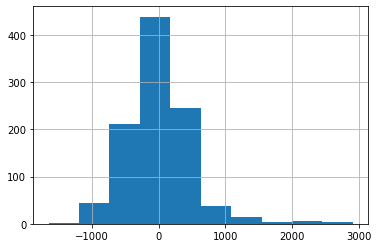

In [49]:
#Assumption check
res=mod5.resid
res.hist()

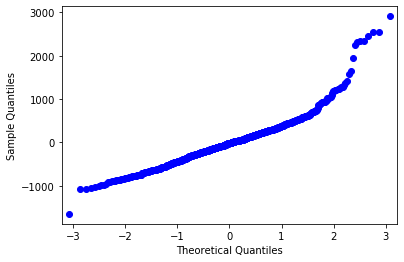

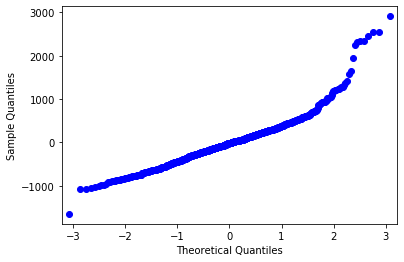

In [50]:
#for normality check
import statsmodels.api as sm
sm.qqplot(res)

In [51]:
# to extract from ols model we use "exog"
pd.DataFrame(mod5.model.exog)

,0,1,2,3,4,5,6
0,1.0,1.0,47500.0,0.0,0.0,0.0,6.0
1,1.0,0.0,63600.0,0.0,0.0,0.0,6.0
2,1.0,0.0,13500.0,0.0,1.0,0.0,18.0
3,1.0,0.0,85600.0,1.0,0.0,0.0,18.0
4,1.0,0.0,68400.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...
995,1.0,0.0,19400.0,1.0,0.0,0.0,18.0
996,1.0,1.0,40500.0,1.0,0.0,0.0,18.0
997,1.0,0.0,44800.0,0.0,0.0,1.0,24.0
998,1.0,0.0,79000.0,2.0,0.0,1.0,18.0


In [52]:
#Multicollinearity check
# how they each independent variable are hiddenly correlated through "variance_inflation"
# the value must be less than 10 then keep tem otherwise reject.
from statsmodels.stats.outliers_influence import variance_inflation_factor
idv = mod5.model.exog
vif = [variance_inflation_factor(idv, i) for i in range(idv.shape[1])]
vif

[13.216570327271516,
 1.0619992174610435,
 1.3463999733468444,
 1.1394392751566271,
 1.5908792151645113,
 1.1433690597703363,
 1.0807254116559717]

In [53]:
pd.DataFrame({'Features':mod5.model.exog_names,'vif':vif})

,Features,vif
0,Intercept,13.216570
1,LocationFar,1.061999
2,Salary,1.346400
3,Children,1.139439
4,HistoryLow,1.590879
5,HistoryMedium,1.143369
6,Catalogs,1.080725


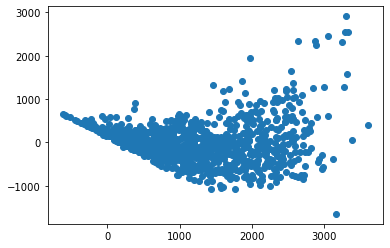

In [54]:
#Constant variance  check for homoscedasticity:
plt.scatter(mod5.predict(),mod5.resid)

In [55]:
#Remidies: Apply log transform to y variable(dependent)
mod6=ols('np.log(AmountSpent)~LocationFar+Salary+Children+HistoryLow+HistoryMedium+Catalogs',data).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(AmountSpent)   R-squared:                       0.841
Model:                             OLS   Adj. R-squared:                  0.840
Method:                  Least Squares   F-statistic:                     875.7
Date:                 Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                         10:58:31   Log-Likelihood:                -365.90
No. Observations:                 1000   AIC:                             745.8
Df Residuals:                      993   BIC:                             780.2
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5752      0.040    138.516      0.000       5.496       5.654
LocationFar       0.3148      0.025     12.521      0.000       0.265       0.364
Salary         1.577e-05    4.2e-07     37.568      0.000    1.49e-05    1.66e-05
Children         -0.1739      0.011    -15.460      0.000      -0.196      -0.152
HistoryLow       -0.6434      0.033    -19.388      0.000      -0.708      -0.578
HistoryMedium    -0.1346      0.029     -4.649      0.000      -0.191      -0.078
Catalogs          0.0381      0.002     21.930      0.000       0.035       0.042
==============================================================================
Omnibus:                       23.840   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.506
Skew:                          -0.300   Prob(JB):                     6.46e-07
Kurtosis:                       3.570   Cond. No.                     2.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

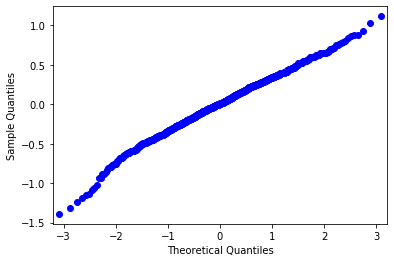

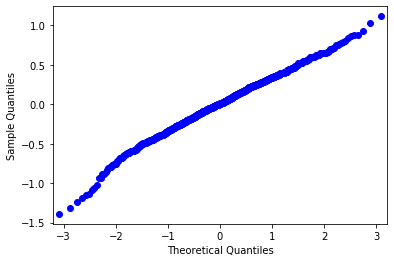

In [56]:
#qqplot
sm.qqplot(mod6.resid)

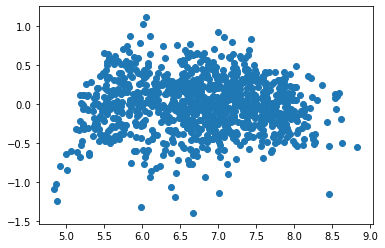

In [57]:
#Constant variance check homoscedasticity
plt.scatter(mod6.predict(),mod6.resid)

In [58]:
# line chart : actual vs predicted
#data['log_amt']=np.log(data['AmountSpent'])
#data['Predicted']=mod6.predict()
#plt.plot(data['log_amt'],"b")
#plt.plot(mod6.predict(),"g")

In [59]:
# test
test=pd.DataFrame({'LocationFar':[1],'Salary':[20000],'Children':[2],'HistoryLow':[1],'HistoryMedium':[0],'Catalogs':[6]})
test

,LocationFar,Salary,Children,HistoryLow,HistoryMedium,Catalogs
0,1,20000,2,1,0,6


In [60]:
mod6.predict(test)

0    5.443015
dtype: float64

In [61]:
np.exp(mod6.predict(test))

0    231.138
dtype: float64

In [62]:
# select the stepwise sheet
%run stepwise.py

<Figure size 432x288 with 0 Axes>

In [63]:
data.dropcolumns=('log_amt')

In [64]:
#select features using forward-backward selection
features=stepwise_selection(X=data.drop('AmountSpent',axis=1),y=data['AmountSpent'])
features

C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Gudavalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning

Add  Salary                         with p-value 7.49541e-148
Add  Catalogs                       with p-value 1.74943e-61
Add  LocationClose                  with p-value 2.00202e-34
Add  Children                       with p-value 6.49865e-36
Add  HistoryMedium                  with p-value 1.07962e-14
Add  HistoryLow                     with p-value 7.50822e-14
Add  LocationFar                    with p-value 6.74845e-15


['Salary',
 'Catalogs',
 'LocationClose',
 'Children',
 'HistoryMedium',
 'HistoryLow',
 'LocationFar']

In [71]:
import statsmodels.api as sm
model=sm.OLS(np.log(data['AmountSpent']),data[features]).fit()
model.summary()
# here the dependent variable is y i.e amount spent taken from the data features since we only need the significant values
# to create a model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     875.7
Date:                Fri, 31 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:11:55   Log-Likelihood:                -365.90
No. Observations:                1000   AIC:                             745.8
Df Residuals:                     993   BIC:                             780.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Salary         1.577e-05    4.2e-07     37.568      0.000    1.49e-05    1.66e-05
Catalogs          0.0381      0.002     21.930      0.000       0.035       0.042
LocationClose     5.5752      0.040    138.516      0.000       5.496       5.654
Children         -0.1739      0.011    -15.460      0.000      -0.196      -0.152
HistoryMedium    -0.1346      0.029     -4.649      0.000      -0.191      -0.078
HistoryLow       -0.6434      0.033    -19.388      0.000      -0.708      -0.578
LocationFar       5.8900      0.043    138.536      0.000       5.807       5.973
==============================================================================
Omnibus:                       23.840   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.506
Skew:                          -0.300   Prob(JB):                     6.46e-07
Kurtosis:                       3.570   Cond. No.                     3.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

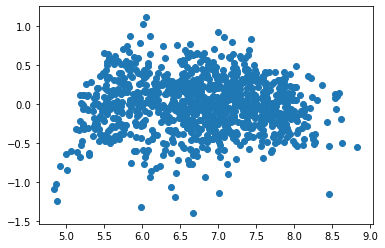

In [72]:
plt.scatter(model.predict(),model.resid)

In [73]:
#mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(data['AmountSpent'],np.exp(model.predict()))
#minimised MSE(mean squared error)avoiding heterscedasticity.

209673.43852280654

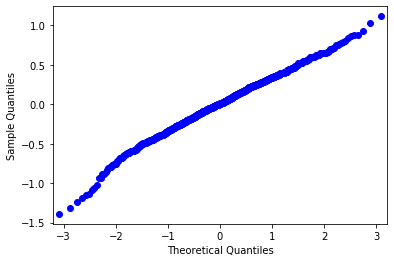

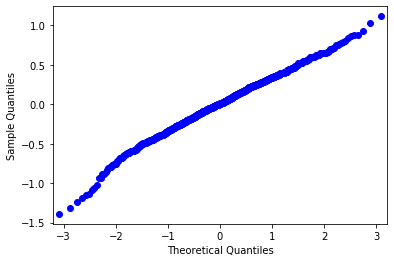

In [75]:
sm.qqplot(model.resid)

In [81]:
#machine learning approach
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(data[features],data['AmountSpent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#coefficient of determination(r2 )
lm.score(data[features],data['AmountSpent'])

0.7461949049621851